In [13]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "Instructions/Pymaceuticals/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "Instructions/Pymaceuticals/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
ct_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
full_df = pd.merge(mouse_df, ct_df, how='outer', on='Mouse ID')

# Set variable 'columns' for later use
columns = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

# Display the data table for preview
# full_df

In [7]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
jac = full_df.drop(['Metastatic Sites', 'Mouse ID'], axis=1)

mean_vol_0 = jac.groupby(['Drug','Timepoint'])
mean_vol = mean_vol_0.mean()
mean_vol.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086

In [8]:
# Convert to DataFrame
mv_df = mean_vol.reset_index()

# Preview DataFrame
mv_df.head()

mv_dff = mv_df.pivot(index='Timepoint', columns='Drug')

mv_dff.columns = mv_dff.columns.droplevel(0)
mv_dff

mv_dff

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
jac1 = full_df.drop(['Metastatic Sites', 'Mouse ID'], axis=1)

std_vol_0 = jac1.groupby(['Drug','Timepoint'])
std_vol = std_vol_0.sem()

# Convert to DataFrame
sev_df = std_vol.reset_index()

# Preview DataFrame
sev_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [10]:
sev_dff = sev_df.pivot(index='Timepoint', columns='Drug')
sev_dff.columns = sev_dff.columns.droplevel(0)
sev_dff

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


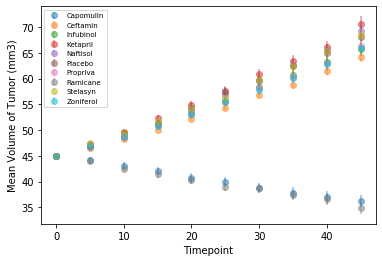

In [20]:
# Generate the Plot (with Error Bars)
# Plot sample means with error bars
def volume_plot():
    fig, ax = plt.subplots()
    for x in columns:
        ax.errorbar(sev_dff.index, mv_dff[x], yerr=sev_dff[x], fmt="o", alpha=0.5, label=x)

    ax.set_xlabel("Timepoint")
    ax.set_ylabel("Mean Volume of Tumor (mm3)")

    plt.legend(loc=2, fontsize="small", prop={'size': 7}, fancybox=False)

    plt.savefig("Tumor Response Scatter")
    plt.show()

volume_plot()

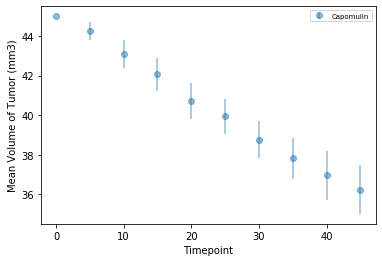

No handles with labels found to put in legend.


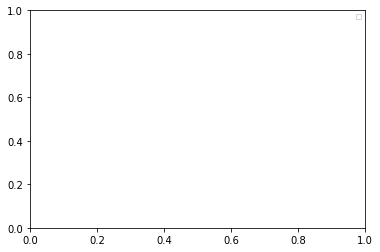

No handles with labels found to put in legend.


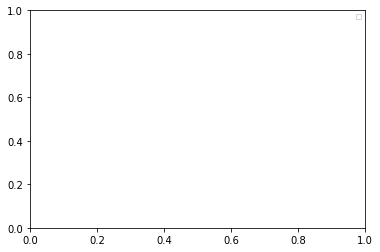

No handles with labels found to put in legend.


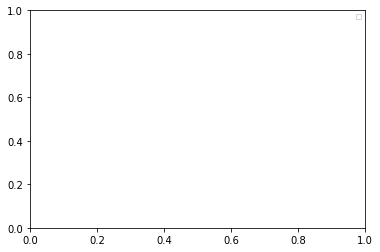

No handles with labels found to put in legend.


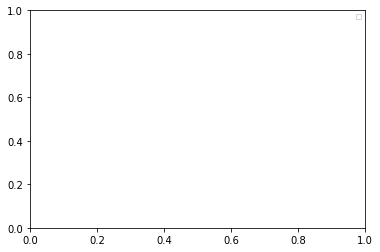

No handles with labels found to put in legend.


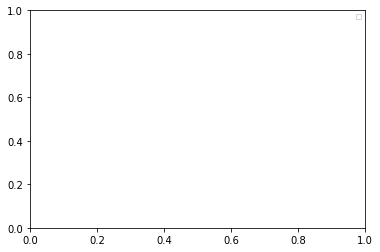

No handles with labels found to put in legend.


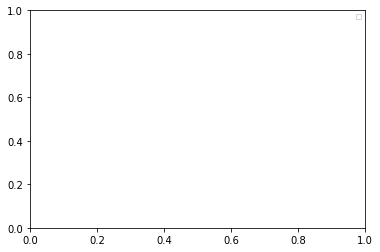

No handles with labels found to put in legend.


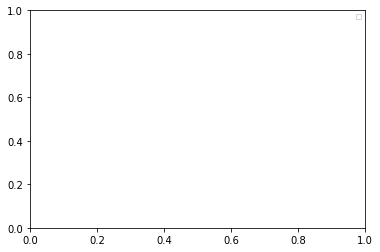

No handles with labels found to put in legend.


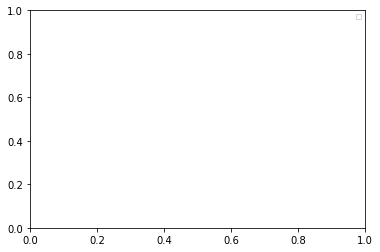

No handles with labels found to put in legend.


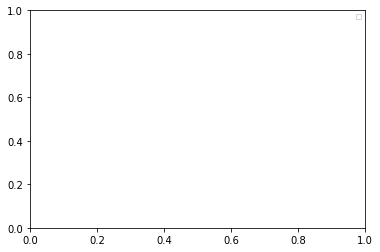

In [25]:
# Generate the Plot (with Error Bars)
# Plot sample means with error bars
def volume_plot():
    fig, ax = plt.subplots()
    for x in columns:
        ax.errorbar(sev_dff.index, mv_dff[x], yerr=sev_dff[x], fmt="o", alpha=0.5, label=x)

        ax.set_xlabel("Timepoint")
        ax.set_ylabel("Mean Volume of Tumor (mm3)")

        plt.legend(loc="best", fontsize="small", prop={'size': 7}, fancybox=False)

        plt.savefig(f"Tumor Response Scatter {x}" )
        plt.show()

volume_plot()